In [4]:
'''
This Jupyter Notebook displays some examples to practically implement
Decision Trees. 
@Reference: 
http://scikit-learn.org/stable/modules/tree.html
'''

'\nThis Jupyter Notebook displays some examples to practically implement\nDecision Trees. \n@Reference: \nhttp://scikit-learn.org/stable/modules/tree.html\n'

In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Load iris dataset
iris = load_iris();

# Create Dataframe for iris features
df_features = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Create Dataframe for iris target
df_target = pd.DataFrame(data=iris.target, columns=['target'])

In [7]:
df_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df_target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [9]:
# 0 => 'setosa', 1 => 'versicolor', 2 => 'virginica'
df = pd.concat([df_features, df_target], axis=1)

# Shuffle the dataset
df = shuffle(df)

df_target = df['target']
df_features = df[iris.feature_names]

In [10]:
df.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
dtype: int64

In [11]:
# Separate training and validation examples
# 100/150 => training and 50/150 => validation
train_feature_data = df_features.iloc[0:100]
train_target_data = df_target.iloc[0:100]
test_feature_data = df_features.iloc[100:150]
test_target_data = df_target.iloc[100:150]

In [12]:
# Create classifier and fit the training data in it
clf = tree.DecisionTreeClassifier()
clf.fit(train_feature_data, train_target_data)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
# Predict
predict_target = clf.predict(test_feature_data)

In [14]:
# Calculate accuracy score
accuracy_score(test_target_data, predict_target)

0.95999999999999996

In [15]:
# returns target value for the given
# target
def getTargetValues(target):
    if target == 0:
        return 'setosa'
    elif target == 1:
        return 'versicolor'
    else:
        return 'virginica'

In [78]:
df_predict = pd.DataFrame(predict_target)

In [79]:
# Get target values for each target
df_predict_values = df_predict.applymap(getTargetValues)

In [80]:
predict_target

array([0, 2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 0,
       1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 0,
       0, 0, 0, 0])

In [82]:
df_predict_values.head()

,0
0,setosa
1,virginica
2,setosa
3,versicolor
4,versicolor


In [20]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [197]:
train_feature_data[[iris.feature_names[pair[0]], iris.feature_names[pair[1]]]].head()

,sepal length (cm),sepal width (cm)
6,4.6,3.4
73,6.1,2.8
78,6.0,2.9
99,5.7,2.8
28,5.2,3.4


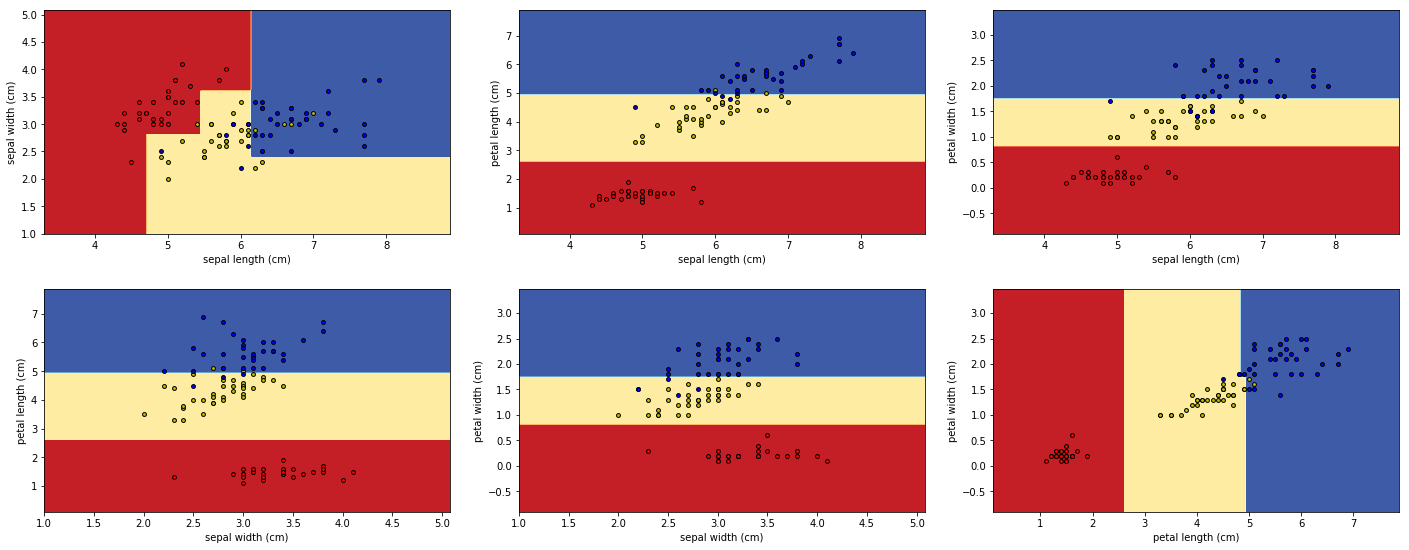

In [307]:
# @Reference: https://stackoverflow.com/questions/36013063/what-is-purpose-of-meshgrid-in-python-numpy

plt.figure(figsize=(20, 8))
color = 'ryb'
for pairIndx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    
    X = train_feature_data[[iris.feature_names[pair[0]], iris.feature_names[pair[1]]]].values
    
    clf = tree.DecisionTreeClassifier(max_depth=3)
    clf.fit(X, train_target_data)

#     xx, yy = np.meshgrid(test_feature_data[iris.feature_names[pair[0]]], 
#                                             test_feature_data[iris.feature_names[pair[1]]])
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.subplot(2, 3, pairIndx + 1)
    plt.tight_layout(pad=2)
    
    Z = Z.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, c in zip(range(3), color):
        idx = np.where(i == train_target_data.values)
        plt.scatter(X[idx, 0], 
                    X[idx, 1], color=c, edgecolor='black', cmap=plt.cm.RdYlBu, label=iris.target_names[i], s=15)

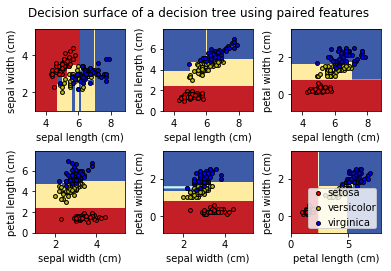

In [279]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()